## Exkurs: Maschinelles Lernen (Lineare Regression)

In dieser Lektion machen wir einen kleinen Exkurs: Wir beschäftigen uns ein bisschen mit maschinellem Lernen. Aber keine Sorge, geht ganz easy :)

In dieser Lektion lernst du:

- Wie du eine Linie durch die Geburtsstatstik zeichnest, die den Trend der Statistik veranschaulicht

Indem wir diese Linie verlängern, können wir versuchen Zukunftsprognosen treffen.

Wir schauen uns nochmal die Häufigkeit des Namens "Anna" für Frauen in Kalifornien an:

In [43]:
# pandas zum Einlesen der csv-Datei und matplotlib zur grafischen Darstellung einbinden
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/names.csv")
df.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


Wir filtern das DataFrame und plotten das Resultat:

In [40]:
name = "Anna"
gender = "F"
state = "CA"

df2 = df[df["Name"] == name]
df3 = df2[df2["Gender"] == gender]
df4 = df3[df3["State"] == state]

df5 = df4.sort_values("Year")

xs = df5["Year"]
ys = df5["Count"]

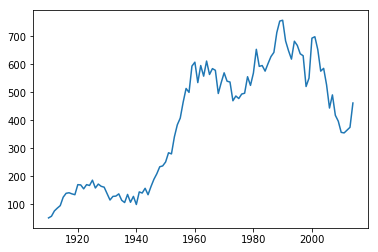

In [2]:
plt.plot(xs, ys)
plt.show()

### Maschinelles Lernen mit dem `scikit-learn`-Modul

Die `LinearRegression()` - Funktion, die eine "passende" Gerade durch unseren Grapfen legt, importieren wir aus dem `scikit-learn` - Modul: 

In [3]:
from sklearn.linear_model import LinearRegression

Bevor wir die Funktion anwenden, müssen wir die Parameter vorbereiten: unsere Eingabewerte (die Jahreszahlen) müssen als höherdimensionale Arrays vorliegen, d.h. wir "verpacken" sie:

In [41]:
xsl = []

for x in xs:
    xsl.append([x])
    
print(xsl)

[[1910], [1911], [1912], [1913], [1914], [1915], [1916], [1917], [1918], [1919], [1920], [1921], [1922], [1923], [1924], [1925], [1926], [1927], [1928], [1929], [1930], [1931], [1932], [1933], [1934], [1935], [1936], [1937], [1938], [1939], [1940], [1941], [1942], [1943], [1944], [1945], [1946], [1947], [1948], [1949], [1950], [1951], [1952], [1953], [1954], [1955], [1956], [1957], [1958], [1959], [1960], [1961], [1962], [1963], [1964], [1965], [1966], [1967], [1968], [1969], [1970], [1971], [1972], [1973], [1974], [1975], [1976], [1977], [1978], [1979], [1980], [1981], [1982], [1983], [1984], [1985], [1986], [1987], [1988], [1989], [1990], [1991], [1992], [1993], [1994], [1995], [1996], [1997], [1998], [1999], [2000], [2001], [2002], [2003], [2004], [2005], [2006], [2007], [2008], [2009], [2010], [2011], [2012], [2013], [2014]]


Jetzt können wir mit `LinearRegression()` ein Modell mit den vorliegenden Daten trainieren. Bei dem "Modell" handelt es sich hier nur um eine Gerade.

In [42]:
model = LinearRegression()

model.fit(xsl, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Welche Voraussagen macht das Modell für bestimmte Jahre (die wir vergleichen könnten, weil dazu ja auch die echten Daten vorliegen)?

In [28]:
model.predict([[1920], [1950]])

array([ 146.15203539,  318.15908494])

Wir schauen uns das Modell über die gesamte Vergangenheit an:

In [29]:
model.predict(xsl)

array([  88.8163522 ,   94.54992052,  100.28348884,  106.01705716,
        111.75062548,  117.48419379,  123.21776211,  128.95133043,
        134.68489875,  140.41846707,  146.15203539,  151.8856037 ,
        157.61917202,  163.35274034,  169.08630866,  174.81987698,
        180.5534453 ,  186.28701362,  192.02058193,  197.75415025,
        203.48771857,  209.22128689,  214.95485521,  220.68842353,
        226.42199184,  232.15556016,  237.88912848,  243.6226968 ,
        249.35626512,  255.08983344,  260.82340176,  266.55697007,
        272.29053839,  278.02410671,  283.75767503,  289.49124335,
        295.22481167,  300.95837998,  306.6919483 ,  312.42551662,
        318.15908494,  323.89265326,  329.62622158,  335.3597899 ,
        341.09335821,  346.82692653,  352.56049485,  358.29406317,
        364.02763149,  369.76119981,  375.49476812,  381.22833644,
        386.96190476,  392.69547308,  398.4290414 ,  404.16260972,
        409.89617804,  415.62974635,  421.36331467,  427.09688

Anschaulicher sieht unser Modell (die Gerade) so aus:

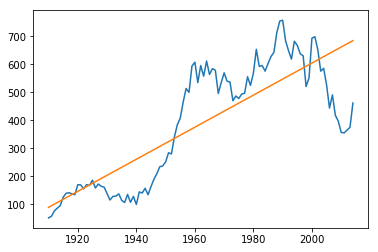

In [30]:
predicted = model.predict(xsl)

plt.plot(xs, ys)
plt.plot(xs, predicted)
plt.show()

Schauen wir uns zum Schluss doch noch eine Zukunftsprognose an, d.h. welche Häufigkeit für den weiblichen Vornamen "Anna" in Kalifornien liefert die in die Zukunft verlängerte Linie?

In [31]:
model.predict([[2050]])

array([ 891.51591679])